In [ ]:
!pip install pmdarima
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,872 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previous

In [ ]:
import os
import pandas as pd
import pandas_datareader.data as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
plt.style.use('seaborn-whitegrid') #sns.set_style("white")
%matplotlib inline
import itertools

<ipython-input-1-b6d6c0b4cc01>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-1-b6d6c0b4cc01>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') #sns.set_style("white")


In [ ]:
# 구글드라이브 마운트 경로 설정
drive_path = '/content/drive/MyDrive/data/'
# 환율 CSV 파일 로드
data_original = pd.read_table(drive_path + 'index_all.csv', sep=",", thousands=',', encoding='CP949')
data  = pd.read_table(drive_path + 'index_all.csv', sep=",", thousands=',', encoding='CP949')
# 날짜를 인덱스로 설정
data_original['날짜'] = pd.to_datetime(data_original['날짜'])
data_original.set_index('날짜', inplace=True)
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)
# 특정 날짜 이후의 데이터 조회
future = data[data.index >= pd.to_datetime('2023-09-01') ]
# 결측치 제거
data  = data.dropna()
# data = data[['DAX', 'VN', 'S&P 500', 'KOSPI', 'FTSE', 'DOWJONES', 'NIKKEI', 'NASDAQ']]

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=21413.057, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=21412.683, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=21414.113, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=21416.015, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=21412.599, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=21414.390, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=21415.954, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=21418.018, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=21414.150, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=21415.043, Time=1.52 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=21417.102, Time=1.68 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=21420.017, Time=1.03 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=21416.003, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=21418.001, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=4.99 sec



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


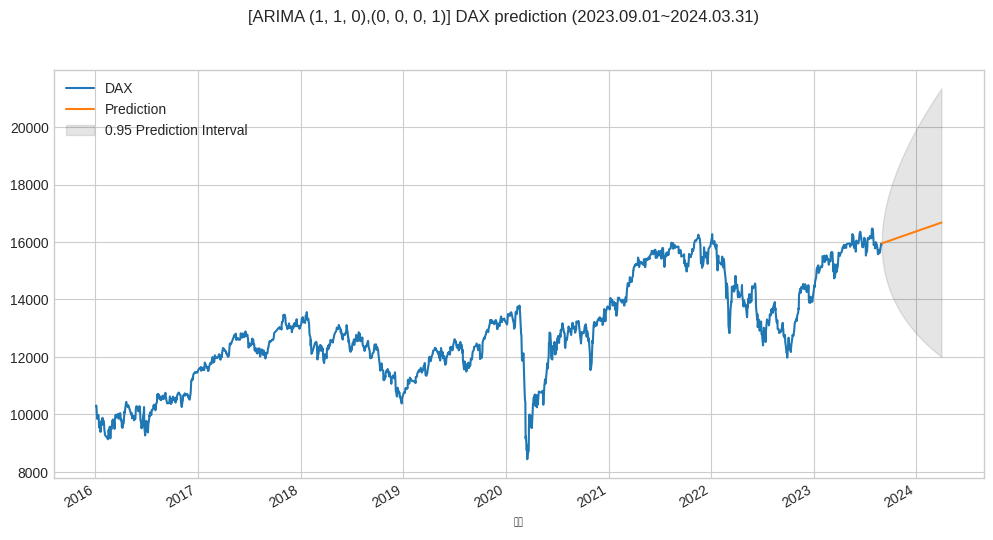

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=13283.848, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=13284.619, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=13285.191, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=13287.133, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=13284.545, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=13284.256, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=13287.213, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=13289.190, Time=1.36 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=13285.080, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=13286.035, Time=1.28 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=13287.280, Time=2.34 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=13288.897, Time=4.64 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=13287.051, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=13288.031, Time=2.09 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=13288.947, Time=2.40

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


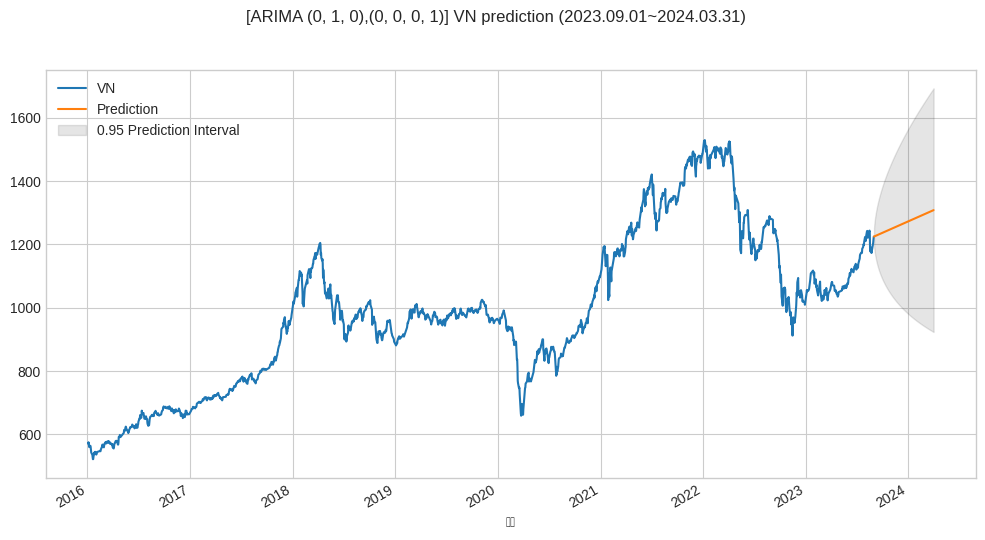

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=16911.679, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=16896.254, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=16888.855, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=16890.780, Time=0.92 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=16893.924, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=16890.973, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=16890.819, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=16892.696, Time=2.27 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=16889.770, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=16891.636, Time=1.93 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=16888.021, Time=2.05 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=16880.334, Time=3.15 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=16891.515, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=16893.491, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=16879.952, Time=3.61

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


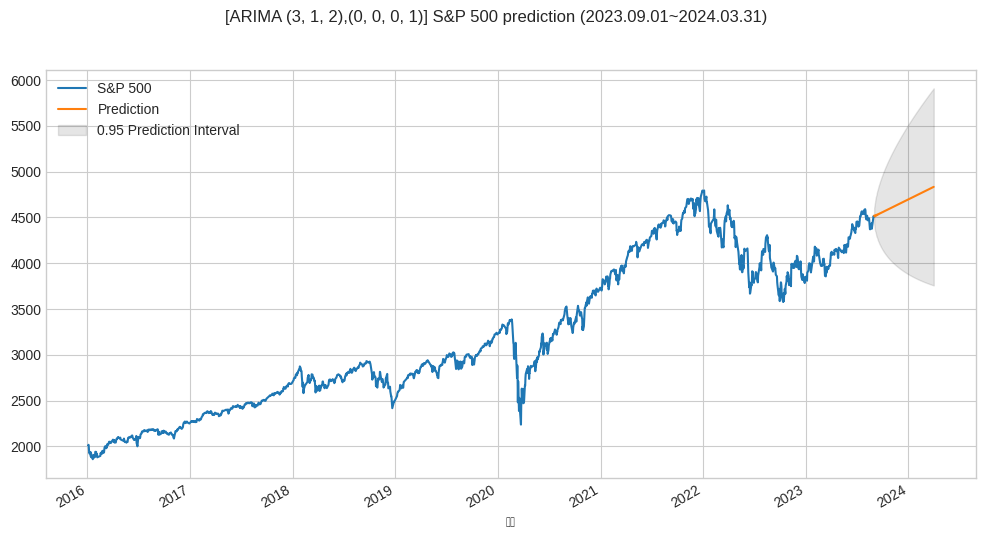

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=8983.740, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=8985.251, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=8983.562, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=8985.142, Time=1.15 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=8985.206, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=8985.529, Time=1.46 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=8985.355, Time=0.83 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=8986.883, Time=1.40 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=8983.667, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=8985.541, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=8983.646, Time=1.50 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=8979.282, Time=4.20 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=8985.402, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=8987.171, Time=3.20 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=8985.656, Time=2.55 sec

Best mode

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


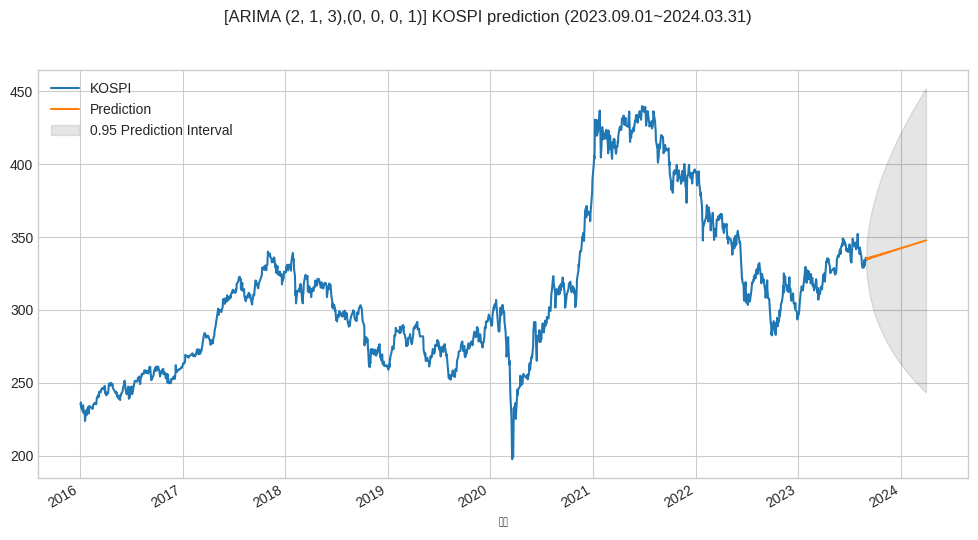

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=18815.102, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=18817.030, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=18819.008, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=18820.890, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=18817.029, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=18819.079, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=18820.867, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=18822.570, Time=1.18 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=18819.005, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=18821.007, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=18822.875, Time=1.59 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=18808.706, Time=5.79 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=18820.853, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=18822.853, Time=0.78 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=18824.592, Time=2.70

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


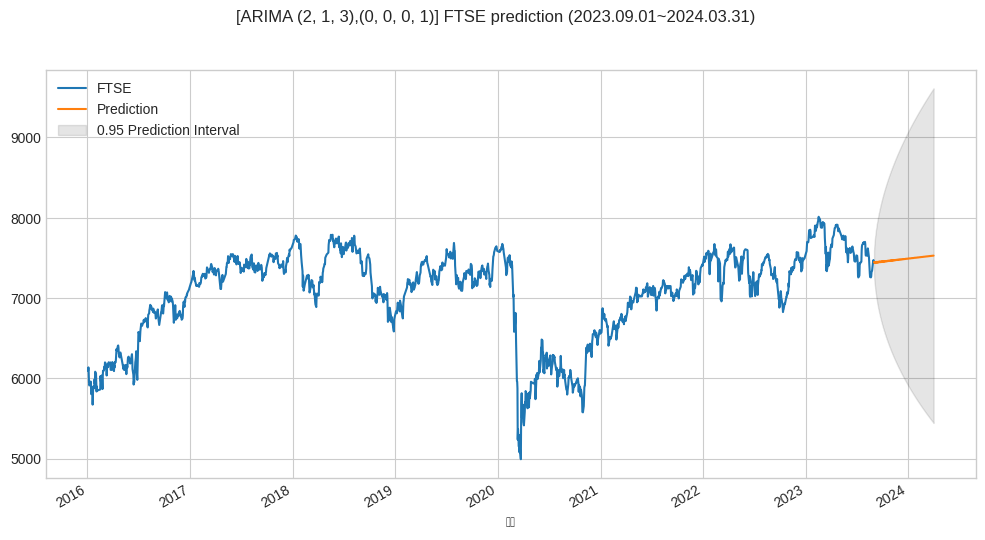

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=23820.893, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=23802.438, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=23787.590, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=23789.361, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=23798.570, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=23788.721, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=23789.389, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=23791.384, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=23787.478, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=23789.448, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=23790.773, Time=1.36 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=23788.105, Time=2.41 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=23789.447, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=23791.450, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=23787.551, Time=5.84

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


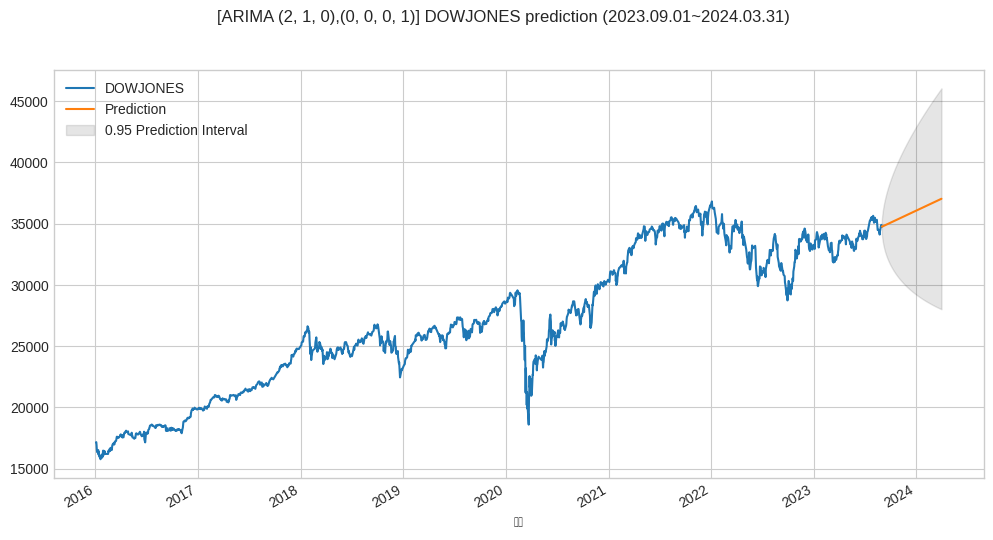

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=23508.052, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=23509.677, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=23505.202, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=23507.165, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=23509.625, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=23508.346, Time=1.38 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=23507.141, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=23509.184, Time=1.35 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=23505.496, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=23507.426, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=23508.621, Time=1.67 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=23506.080, Time=6.75 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=23507.365, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=23509.099, Time=1.13 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=23505.980, Time=3.70

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


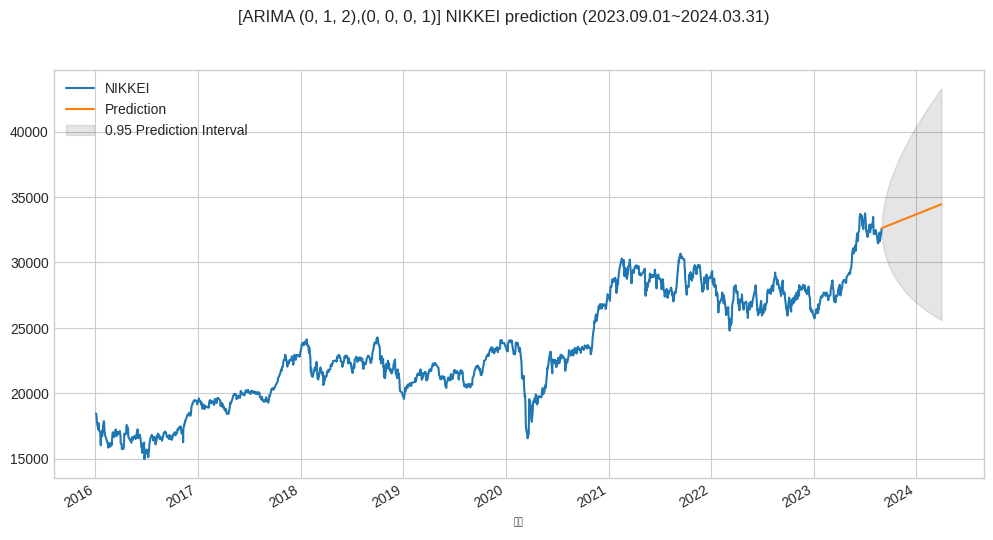

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=21416.334, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=21403.667, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=21403.058, Time=0.67 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=21405.012, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=21402.656, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=21403.896, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=21405.063, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=21406.809, Time=1.09 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=21403.457, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=21405.336, Time=2.73 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=21405.482, Time=2.44 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=21397.060, Time=3.04 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=21404.984, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=21406.855, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=21396.801, Time=3.76

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


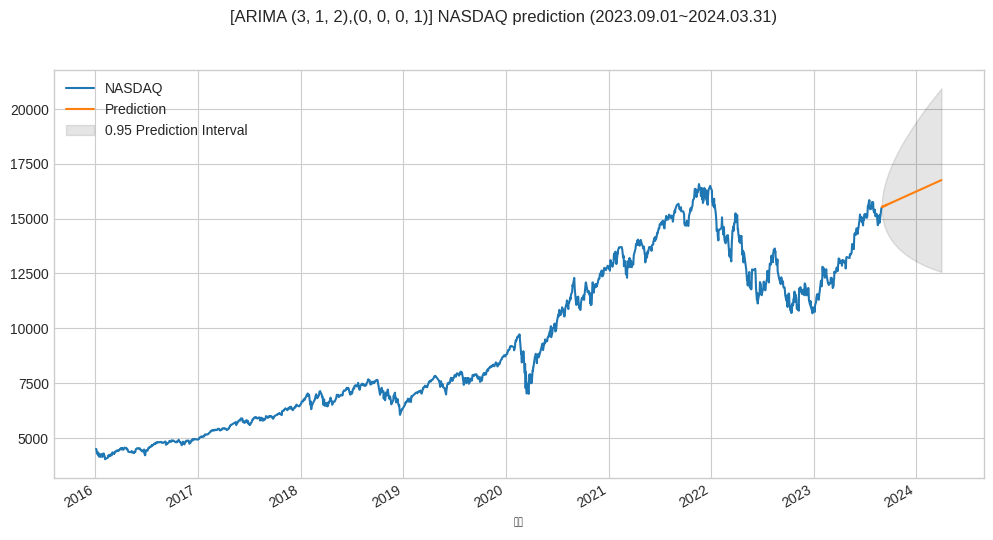

In [ ]:
for i in range(0, data.shape[1]):
  index_name = data.columns[i] # 현재 주가지수 이름
  cur_data = data[[index_name]]
  train_data = cur_data
  # Differencing
  diff_train_data =  train_data.copy()
  diff_train_data =  diff_train_data[index_name].diff()
  diff_train_data = diff_train_data.dropna()
  # ARIMA 모델 학습
  model = ARIMA(train_data.values, order=(1,1,0))
  model_fit = model.fit()
  # model_fit.summary()
  auto_arima_model = auto_arima(train_data, start_p = 1, start_q = 1, max_p = 3, max_q = 3,
                              d=1, trace=True, error_action='ignore', supress_warnings=True, stepwise=False)
  # auto_arima_model.summary()
  # 예측
  prediction = auto_arima_model.predict(213, return_conf_int=True)
  predicted_value = prediction[0]
  predicted_ub = prediction[1][:,0]
  predicted_lb = prediction[1][:,1]
  predict_index = list(future.index)
  # 결과 저장
  data_dict = {'날짜': predict_index, index_name : predicted_value}
  result = pd.DataFrame(data_dict)
  result.set_index('날짜', inplace=True)
  data_original[index_name] = result[index_name]
  # 시각화
  fig, ax = plt.subplots(figsize=(12,6))
  cur_data.plot(ax=ax);
  # ax.vlines('2023-09-01', 0, 40000, linestyle='--', color='r', label='Start of Forecast');
  ax.plot(predict_index, predicted_value, label='Prediction')
  ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
  ax.legend(loc='upper left')
  plt.suptitle(f'[ARIMA {auto_arima_model.order},{auto_arima_model.seasonal_order}] {index_name} prediction (2023.09.01~2024.03.31)')
  plt.show()


In [ ]:
index_future = data_original[data_original.index >= '2023-09-01']
index_future

,DAX,VN,S&P 500,KOSPI,FTSE,DOWJONES,NIKKEI,NASDAQ
날짜,,,,,,,,
2023-09-01,15952.486034,1224.443007,4519.207282,335.062021,7448.095768,34753.982861,32607.587654,15527.080791
2023-09-02,15955.975956,1224.836013,4518.386485,335.010923,7442.671523,34746.454667,32629.988701,15554.079546
2023-09-03,15959.392071,1225.229020,4512.020381,334.552461,7437.229469,34761.158800,32638.603613,15551.828155
2023-09-04,15962.805342,1225.622027,4510.076822,335.265655,7446.895616,34769.884337,32647.218525,15532.792019
2023-09-05,15966.218504,1226.015033,4515.848022,335.136793,7447.311502,34781.220223,32655.833438,15529.256206
...,...,...,...,...,...,...,...,...
2024-03-27,16662.502655,1306.188391,4826.885614,347.312495,7526.922276,36977.395532,34413.275507,16732.557403
2024-03-28,16665.915813,1306.581397,4828.401397,347.384628,7527.555406,36988.162018,34421.890419,16738.356066
2024-03-29,16669.328970,1306.974404,4829.917179,347.436053,7528.326766,36998.928504,34430.505331,16744.141349


In [ ]:
# Colab 파일을 Google 드라이브에 복사
import shutil
index_future
index_future.to_csv('index_future.csv', index=True, encoding='utf-8-sig')
shutil.copy('index_future.csv', '/content/drive/MyDrive/data/')

'/content/drive/MyDrive/data/index_future.csv'